# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [56]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [57]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
caracteres_title = df['title'].str.len()
df['title_length'] = caracteres_title
df['title_length']


0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64

In [58]:
# Calcula media, mediana y moda de la columna 'title_length'
media = round(df['title_length'].mean(), 2)
mediana = round(df['title_length'].median(), 2)
moda = round(df['title_length'].mode(), 2)
results= {'Media': float(media), 
          'Mediana': float(mediana), 
          'Moda': float(moda)
          }
results



/tmp/ipykernel_649/3619843182.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Moda': float(moda)


{'Media': 15.48, 'Mediana': 14.0, 'Moda': 12.0}

In [59]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_estandar = df['title_length'].std()
results= {'Rango': float(rango),
           'Varianza': float(varianza), 
           'Desviacion_estandar': float(desviacion_estandar)
           }
results

{'Rango': 67.0,
 'Varianza': 72.1067488840288,
 'Desviacion_estandar': 8.491569282766807}

In [60]:
# Calcula asimetría y curtosis de la columna 'title_length'
skewness = df['title_length'].skew()
curtosis = df['title_length'].kurt()
results= {'Asimetria': float(skewness),
          'Curtosis': float(curtosis)
          }
results


{'Asimetria': 1.5252523464631278, 'Curtosis': 3.8122887061291544}

In [61]:
# Imprime el título más corto y el título más largo según su longitud
titulo_largo = caracteres_title.max()
titulo_corto = caracteres_title.min()
results= {'Titulo_corto': float(titulo_corto),
          'Titulo_largo': float(titulo_largo)
          }
results


{'Titulo_corto': 1.0, 'Titulo_largo': 68.0}

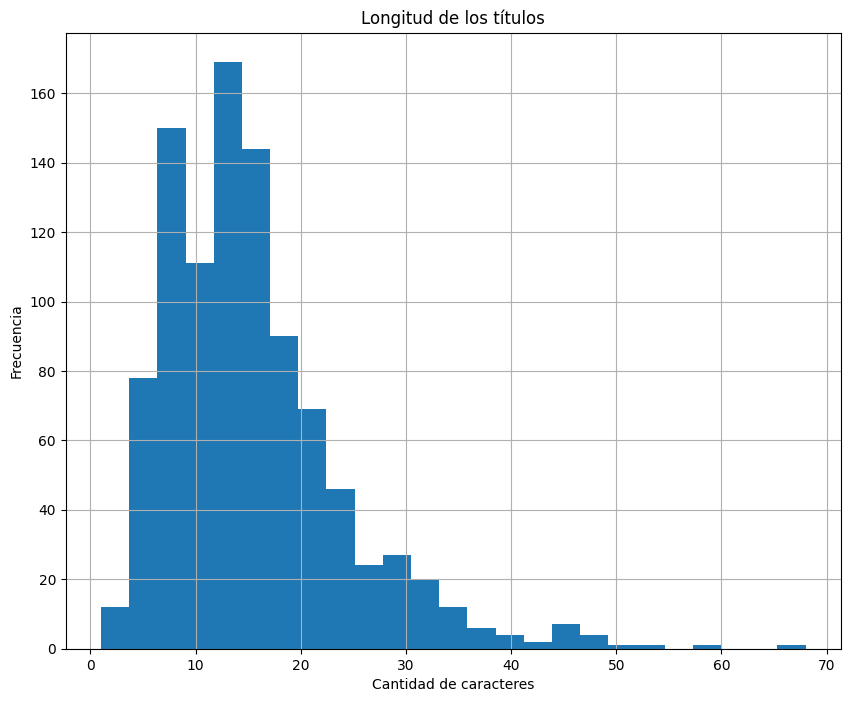

In [62]:
# grafica tus resultados
plt.figure(figsize=(10, 8))
plt.hist(df["title_length"], 
         bins=25
         )
plt.title("Longitud de los títulos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.grid()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [63]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
los_cinco = df['title_length'].iloc[0:5].tolist()
los_cinco

[24, 13, 22, 15, 12]

In [70]:
# Calcula la media de los 5 valores
media_los_cinco = sum(los_cinco) / len(los_cinco)
results = {'Media': media_los_cinco}
results

{'Media': 17.2}

In [72]:
# Calcula las diferencias al cuadrado con respecto a la media
np_los_cinco = np.array(los_cinco)
diferencias_cuadrado = (np_los_cinco - media_los_cinco) ** 2
diferencias_cuadrado

array([46.24, 17.64, 23.04,  4.84, 27.04])

In [66]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
suma_cuadrados = sum(diferencias_cuadrado)
cantidad_valores = len(los_cinco)
varianza = suma_cuadrados / (cantidad_valores - 1)
desviacion_estandar = np.sqrt(varianza)
desviacion_estandar

np.float64(5.449770637375485)